## Q1. What is the mathematical formula for a linear SVM?

A linear SVM (Support Vector Machine) is a type of machine learning algorithm used for classification tasks. It finds a linear boundary (also called hyperplane) that separates data points of different classes in a high-dimensional space. The mathematical formula for a linear SVM can be expressed as follows:

Given a training set of input vectors x and corresponding binary output labels y (either -1 or +1), the goal of a linear SVM is to find a weight vector w and bias term b such that the decision boundary is defined as:

- f(x) = sign(w*x + b)

where sign() is the sign function which returns -1 or +1 depending on whether the argument is negative or positive.

The weight vector w and bias term b are determined by solving the following optimization problem:

minimize 0.5||w||^2 subject to y_i(w*x_i + b) >= 1 for all i

where ||w|| is the L2 norm of the weight vector and i indexes the training examples. The optimization problem seeks to find the maximum-margin hyperplane that separates the two classes of data points, while also satisfying the constraint that all points are correctly classified.

## Q2. What is the objective function of a linear SVM?

The objective function of a linear Support Vector Machine (SVM) is to find the optimal hyperplane that separates the data points of different classes with the largest possible margin. The objective function consists of two terms: a regularization term and a margin term.

The objective function can be formulated as follows:

- Minimize: ½‖w‖² + C∑ξᵢ

1. The first term, ½‖w‖², represents the regularization term or the "ridge penalty." It encourages the weights (w) to be small, resulting in a simpler model and preventing overfitting. The term ‖w‖² represents the Euclidean norm (or squared Euclidean norm) of the weight vector.

2. The second term, C∑ξᵢ, represents the margin term or the "loss term." It captures the classification errors or misclassifications made by the SVM. ξᵢ represents the slack variables associated with each training example, and C is the regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification errors. Increasing the value of C penalizes misclassifications more heavily, resulting in a smaller margin but potentially better classification accuracy.



## Q3. What is the kernel trick in SVM?

The kernel trick is a technique used in Support Vector Machines (SVMs) to transform the input data into a higher-dimensional space without explicitly computing the transformed features. The idea behind this technique is to use a kernel function that computes the inner product of the transformed data points without actually computing the transformed data points themselves.

In other words, the kernel function takes the original data points as inputs and returns the inner product of their transformed versions, which can be used as a measure of similarity between the data points in the higher-dimensional space.

The use of the kernel function makes it possible to apply SVMs to non-linearly separable data by mapping the data points to a higher-dimensional space, where they are more likely to be linearly separable.

The most commonly used kernel functions in SVMs are the linear kernel, polynomial kernel, and radial basis function (RBF) kernel. The choice of kernel function depends on the nature of the data and the problem at hand.

The use of the kernel trick in SVMs has the advantage of allowing the algorithm to learn complex decision boundaries in high-dimensional spaces, without explicitly computing the transformed features. This can result in better performance and more efficient computation, compared to explicitly computing the transformed features.

## Q4. What is the role of support vectors in SVM Explain with example

SVM, support vectors play a critical role in determining the position of the decision boundary, which separates the different classes of data points.

Support vectors are the data points that lie closest to the decision boundary and have a non-zero weight in the SVM model. They are the most influential data points in defining the position and orientation of the decision boundary.

For example, consider a binary classification problem where the goal is to separate two classes of data points, represented by red and blue dots in a two-dimensional space. The SVM algorithm will find the hyperplane that best separates the two classes of data points, as shown in the figure below: In this example, the support vectors are the data points that lie closest to the decision boundary, as shown by the black circles in the figure. These support vectors play a critical role in defining the position and orientation of the decision boundary, and any changes to the position or orientation of the boundary will only affect the classification of data points that are closer to the boundary than the support vectors.

The SVM algorithm aims to maximize the margin, which is the distance between the decision boundary and the closest support vectors. By maximizing the margin, the algorithm tries to ensure that the decision boundary is as far away from the closest data points as possible, which can help improve the generalization performance of the SVM model.

The support vectors are also used to classify new data points. A new data point is classified based on its distance to the decision boundary and the position of the support vectors. If a new data point is closer to one set of support vectors than the other, it will be classified as belonging to the class associated with those support vectors.

Overall, the support vectors are essential in SVM as they determine the position of the decision boundary, play a critical role in the classification of new data points, and help improve the generalization performance of the model.

## Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

1. Hyperplane:

The hyperplane is the decision boundary that separates the two classes in SVM. In a binary classification problem, the hyperplane is a line in 2D, a plane in 3D, and a hyperplane in higher dimensions.  The goal of SVM is to find the hyperplane that maximizes the margin between the two classes.

2. Marginal plane:

 The marginal plane is the plane that runs parallel to the hyperplane and touches the support vectors. The distance between the hyperplane and the marginal plane is called the margin. In SVM, the goal  is to maximize the margin between the hyperplane and the marginal plane.

3. Hard margin:

 In hard margin SVM, the algorithm tries to find a hyperplane that perfectly separates the two classes of data points without any errors. This works only if the data points are linearly separable.

4. Soft margin:

 In soft margin SVM, the algorithm allows some misclassification errors by introducing a slack variable that relaxes the strictness of the margin. This helps in cases where the data points are not  linearly separable. The objective function of soft margin SVM is to find a hyperplane that minimizes the errors and maximizes the margin.

Overall, these concepts are fundamental to understanding SVM and its various types.

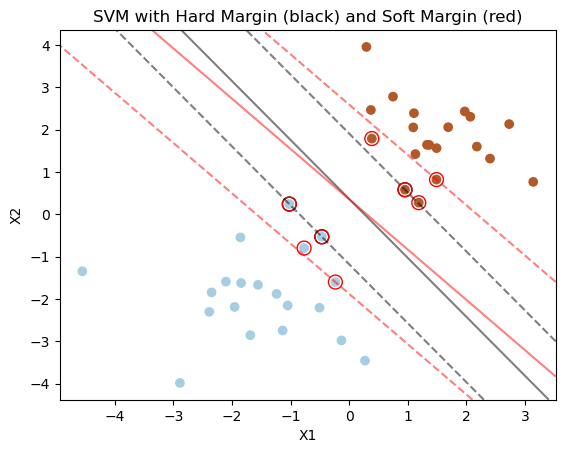

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generate random data points for two classes
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
y = [-1] * 20 + [1] * 20

# Create an SVM classifier with different margin settings
svm_hard = svm.SVC(kernel='linear', C=1000)  # Hard margin SVM
svm_soft = svm.SVC(kernel='linear', C=0.1)  # Soft margin SVM

# Fit the models to the data
svm_hard.fit(X, y)
svm_soft.fit(X, y)

# Plotting the data points and decision boundaries
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid to evaluate the model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Plot the hyperplane and margins
Z_hard = svm_hard.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z_hard, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
Z_soft = svm_soft.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z_soft, colors='r', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Plot support vectors
ax.scatter(svm_hard.support_vectors_[:, 0], svm_hard.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
ax.scatter(svm_soft.support_vectors_[:, 0], svm_soft.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='r')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM with Hard Margin (black) and Soft Margin (red)')
plt.show()


## Q6. SVM Implementation through Iris dataset.

- ###  Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
- ###  Train a linear SVM classifier on the training set and predict the labels for the testing setl
- ###  Compute the accuracy of the model on the testing setl
- ###  Plot the decision boundaries of the trained model using two of the featuresl
- ###  Try different values of the regularisation parameter C and see how it affects the performance of the model.

Accuracy: 0.9


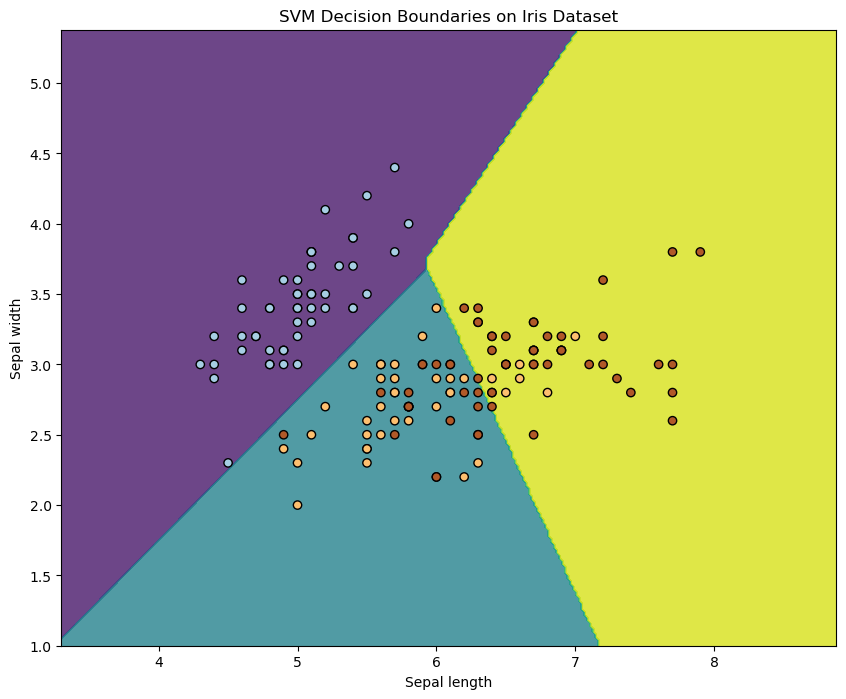

C=0.1, Accuracy: 0.8333333333333334
C=1, Accuracy: 0.9
C=10, Accuracy: 0.9
C=100, Accuracy: 0.9


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Load the Iris dataset and split it into a training set and a testing set
iris = datasets.load_iris()
X = iris.data[:, :2]  # Select only the first two features for visualization
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train a linear SVM classifier on the training set and predict the labels for the testing set
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

# Step 3: Compute the accuracy of the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Step 4: Plot the decision boundaries of the trained model using two features
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundaries on Iris Dataset')
plt.show()

# Step 5: Try different values of the regularization parameter C and see how it affects the performance
C_values = [0.1, 1, 10, 100]
for C in C_values:
    svm_classifier = SVC(kernel='linear', C=C)
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"C={C}, Accuracy: {accuracy}")
